# Optimal Control as Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

## Example Optimal Path
Given the following cost functional and boundary conditions, we solve for and plot the optimal path and acceleration.
\begin{align*}
    J(u) &= \int_0^{30} x^2 + \frac{2\pi}{5}u^2dt \\
    s(t) &= \begin{bmatrix}x(t)\\x'(t) \end{bmatrix}, s(0) = \begin{bmatrix}0\\1 \end{bmatrix}, \quad s(30) = \begin{bmatrix}16\\10 \end{bmatrix}
\end{align*}
We plot the solutions for the optimal $x(t)$ and $u(t)$.

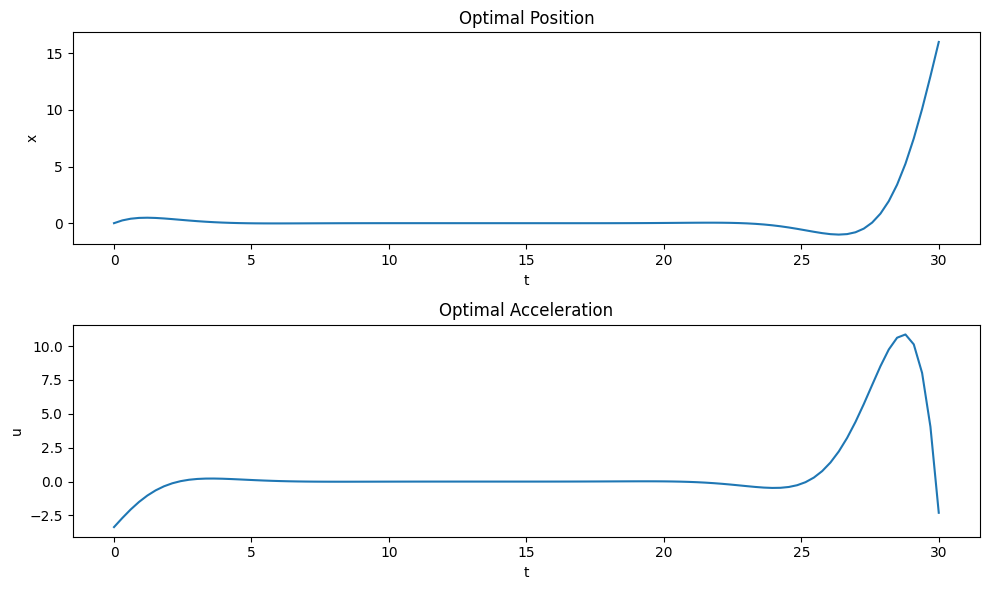

In [2]:
def prob1():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    

    # define the problem function
    def fun(x, y):
        return np.array([x[0], x[1] - 1, y[0] - 16, y[1] - 10])
    
    # define the ode system
    def ode(t, y):
        return np.array([y[1], 5 / 4 / np.pi * y[3], -2 * y[0], y[2]])
    
    # initialize the problem
    steps = 100
    end = 30
    t = np.linspace(0, end, steps)

    y0 = np.ones((4, steps))
    solution = solve_bvp(ode, fun, t, y0)

    # plot the solution
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(solution.x, solution.y[0], label='x')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title("Optimal Position")

    plt.subplot(2, 1, 2)
    plt.plot(solution.x, solution.y[3], label='y')
    plt.xlabel('t')
    plt.ylabel('u')
    plt.title("Optimal Acceleration")

    plt.tight_layout()
    plt.show()

prob1()

## Example Obstacle Avoidance
Using the ODEs from before, a new obstacle function, and the following boundary conditions and parameters, we solve for and plot the optimal path.
\begin{align*}
    t_0 = 0 &, \quad t_f = 20\\
    (c_x,c_y) &= (4,1)\\
    (r_x,r_y) &= (5,.5)\\
    \lambda &= 20\\
    s_0 = \begin{bmatrix}6\\1.5\\0\\0 \end{bmatrix}&, \quad s_f = \begin{bmatrix}0\\0\\0\\0 \end{bmatrix}
\end{align*}

In [3]:
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse


def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom


def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

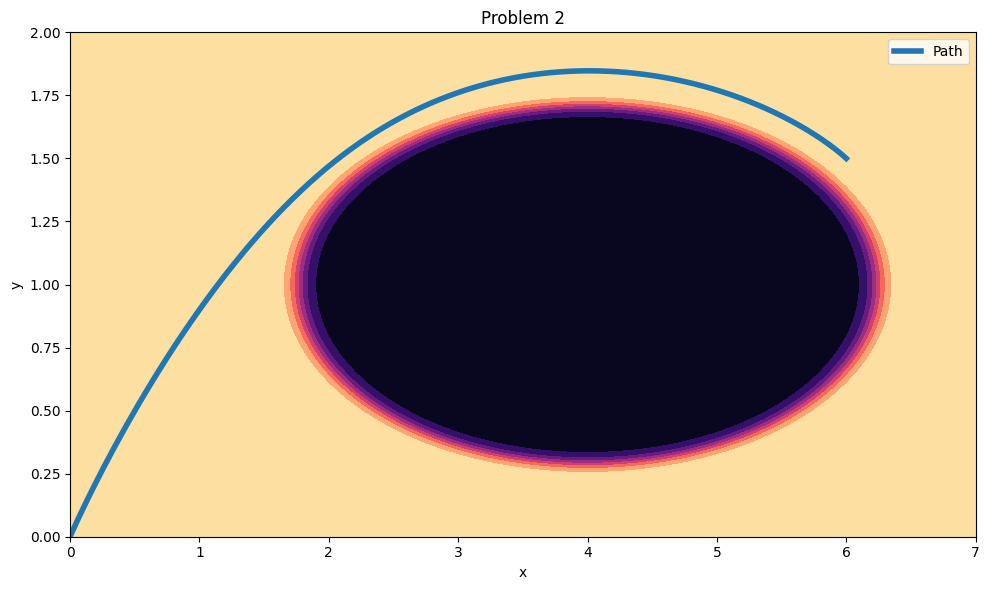

In [4]:
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    W1, W2 = 3, 70
    c = (4, 1)
    r = (5, 0.5)

    def fun2(x, y):
        return np.array([x[0] - 6, x[1] - 1.5, x[2], x[3], 
                         y[0], y[1], y[2], y[3]])
    
    def ode2(t, y):
        return np.array([y[2], y[3], y[6]/2/W2, y[7]/2/W2,
                         obstacle_dx(y[0], y[1], W1, r, c),
                         obstacle_dy(y[0], y[1], W1, r, c),
                         -y[4], -y[5]])
    
    # initialize the problem
    steps = 100
    end = 20
    t = np.linspace(0, end, steps)

    # guess and solve
    y0 = np.ones((8, steps))
    solution = solve_bvp(ode2, fun2, t, y0, max_nodes=30000)
    X, Y = np.meshgrid(np.linspace(0, 7, len(solution.y[0])), np.linspace(0, 2, len(solution.y[1])))
    obs = obstacle(X, Y, W1, r, c)

    # plot the solution
    plt.figure(figsize=(10, 6))
    plt.plot(solution.y[0], solution.y[1], label='Path', linewidth=4)
    plt.contourf(X, Y, obs, cmap='magma_r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Problem 2")
    plt.tight_layout()
    plt.legend()
    plt.show()

prob2()

## Example Boundary Value Problem
We solve the following boundary value problem and plot the solution:
\begin{align*}
    y'' + 3y &= \sin(t)\\
    y(0) = 0,\quad y(t_f) = &\frac{\pi}{2}, \quad y'(t_f) = \frac{1}{2}\left(\sqrt{3}\pi \cot(\pi\sqrt{75}) - 1 \right).
\end{align*}

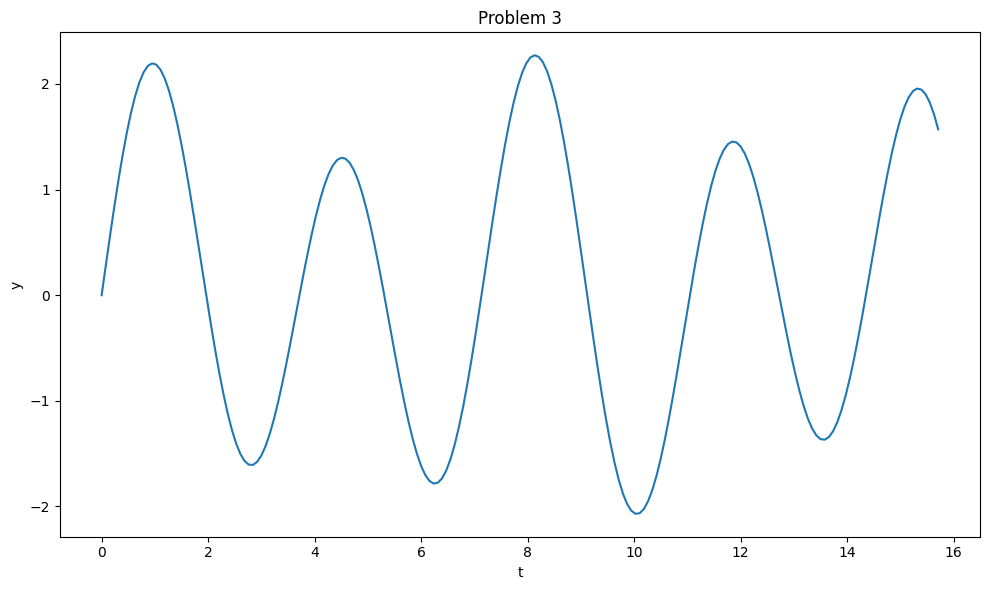

The tf end time is:  15.707970044371987


In [5]:
def prob3():
    '''
    Solve the free time horizon BVP.
    Plot the solution and return the correct end time
    '''
    def ode(t,y,p):
        ''' define the ode system '''
        return p[0]*np.array([y[1], np.sin(p[0]*t) - 3*y[0]])
    
    def bc(ya,yb,p):
        ''' define the boundary conditions '''
        return np.array([ya[0], yb[0]-np.pi/2, yb[1] - .5*(np.sqrt(3)*np.pi/np.tan(np.pi*np.sqrt(75))-1)])
    
    # give the time domain
    t_steps = 200
    t = np.linspace(0,1,t_steps)

    # give an initial guess and solve
    y0 = np.ones((2,t_steps))
    p0 = np.array([5*np.pi])
    sol = solve_bvp(ode, bc, t, y0, p0)

    # plot the solution
    plt.figure(figsize=(10,6))
    plt.plot(sol.p[0]*t, sol.sol(t)[0])
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Problem 3')
    plt.tight_layout()
    plt.show()

    print('The tf end time is: ', sol.p[0])

prob3()


## Obstacle Avoidance
We refactor the code from the previous obstacle avoidance example to create a free end time BVP and use a new boundary value derived from 

$H(t_f,p(t_f),s(t_f),u(t_f)) = 0.$

We let $W_1 = 4$ and $W_2 = 0.1$, and use $6$ as the initial guess for p(0).
We plot the solution found and print the optimal time.

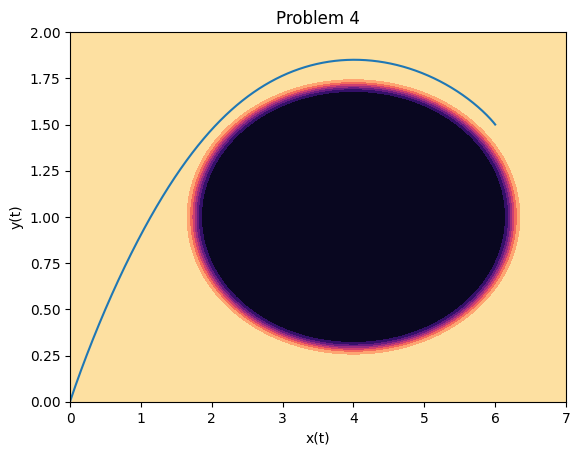

The optimal time is 3.735617029670278


In [6]:
def prob4():
    '''
    Find the optimal path and time for the free time horizon problem.
    Plot the solution and return the optimal time.
    '''
    
    W1, W2 = 4, 0.1
    c = (4, 1)
    r = (5, 0.5)
    
    def fun4(ya, yb, p):
        return np.array([ya[0] - 6, ya[1] - 1.5, ya[2], ya[3],
                         yb[0], yb[1], yb[2], yb[3], 
                         yb[4]*yb[2] + yb[5]*yb[3] + yb[6]**2/2/W2 + yb[7]**2/2/W2 - 
                         (1 + obstacle(yb[0], yb[1], W1, r, c) + W2*((yb[6]/2/W2)**2 + (yb[7]/2/W2)**2))])
    
    def ode4(t,y, p):
        return p[0]*np.array([y[2], y[3] , y[6]/2/W2, y[7]/2/W2, 
                              obstacle_dx(y[0], y[1], W1, r, c), 
                              obstacle_dy(y[0], y[1], W1, r, c), 
                              -y[4], -y[5]])
    
    # Set up elements
    steps = 100
    end = 20
    t = np.linspace(0, end, steps)
    
    # Guess and solve
    y0 = np.ones((8, steps))*3
    p0 = np.array([6])
    
    sol = solve_bvp(ode4, fun4, t, y0, p0, max_nodes=30000)
    X,Y = np.meshgrid(np.linspace(0, 7, len(sol.y[1])), np.linspace(0, 2, len(sol.y[1])))
    obs = obstacle(X, Y, W1, r, c)

    # Plot solution
    plt.plot(sol.y[0], sol.y[1], label="Optimal Path")
    plt.contourf(X, Y, obs, cmap='magma_r')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.xlim(0, 7)
    plt.title("Problem 4")
    plt.show()
    
    print("The optimal time is", sol.p[0] * 20)
    
prob4()